In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
gdf = gpd.read_file(r"G:\My Drive\Investigacion2025\Posgrado_Statistics\GeoAnalysis\data\Balso_Municipios.gpkg")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   dpto_cnmbr                               1121 non-null   object  
 1   mpio_cnmbr                               1121 non-null   object  
 2   mpio_narea                               1121 non-null   float64 
 3   NUMPOINTS                                1121 non-null   float64 
 4   elev_mean                                1121 non-null   float64 
 5   Temperatura_media_anual_mean             1121 non-null   float64 
 6   Precipitacion_anual_mean                 1121 non-null   float64 
 7   Rango_medio_diurno_mean                  1121 non-null   float64 
 8   Precipitacion_mes_mas_lluvioso_mean      1121 non-null   float64 
 9   Precipitacion_mes_mas_seco_mean          1121 non-null   float64 
 10  Isotermalidad_mean          

In [3]:
gdf = gdf.rename(columns={'dpto_cnmbr': 'departamento', 
                    'mpio_cnmbr': 'municipio',
                    'mpio_narea': 'area',
                    'NUMPOINTS': 'conteo'})
gdf.head(3)

,departamento,municipio,area,conteo,elev_mean,Temperatura_media_anual_mean,Precipitacion_anual_mean,Rango_medio_diurno_mean,Precipitacion_mes_mas_lluvioso_mean,Precipitacion_mes_mas_seco_mean,Isotermalidad_mean,Estacionalidad_de_la_temperatura_mean,Rango_anual_de_temperatura_mean,Estacionalidad_de_la_precipitacion_mean,geometry
0,ANTIOQUIA,MEDELLÍN,374.834005,18.0,2030.00,18.157167,2487.400000,9.573711,335.133333,94.466667,89.996162,37.960908,10.638400,36.525846,"MULTIPOLYGON (((-75.66974 6.3736, -75.66965 6...."
1,ANTIOQUIA,ABEJORRAL,507.141095,0.0,1963.75,17.530000,2419.958333,8.855028,295.500000,102.708333,90.066731,30.902316,9.848834,31.626925,"MULTIPOLYGON (((-75.46938 5.94575, -75.46897 5..."
2,ANTIOQUIA,ABRIAQUÍ,296.894050,0.0,2375.80,15.494967,2391.933333,8.703756,329.600000,69.400000,87.985126,33.218638,9.897067,41.646924,"MULTIPOLYGON (((-76.08351 6.7505, -76.08325 6...."


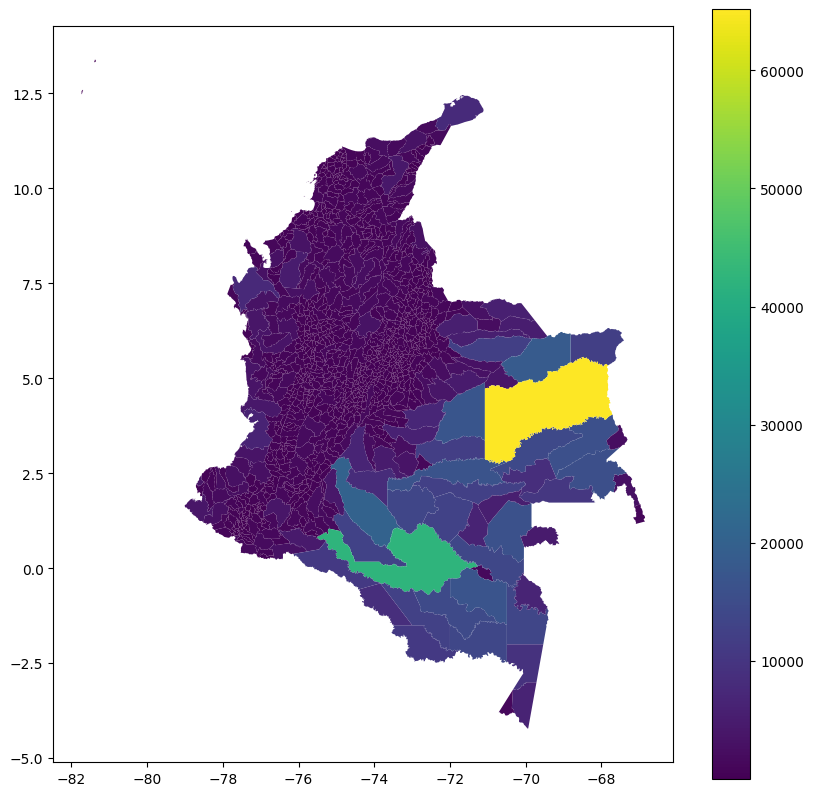

In [4]:
f, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='area', legend=True, ax=ax)
plt.show()

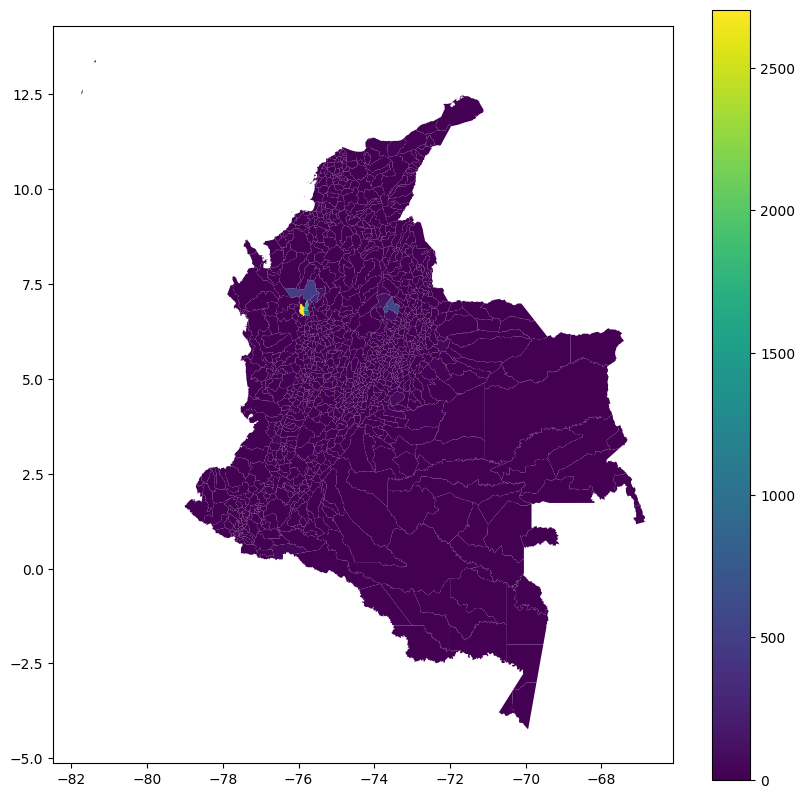

In [12]:
f, ax = plt.subplots(1, figsize=(10, 10))
gdf.plot(column='conteo', legend=True, ax=ax)
plt.show()

In [55]:
gdf.columns

Index(['departamento', 'municipio', 'area', 'conteo', 'elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean', 'geometry'],
      dtype='object')

# Distribución normal (Regresión lineal Gaussiana)

In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Preparar datos
gdf["y_log"] = np.log(gdf['conteo'] + 1)
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']

# Escalar variables
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción en el modelo
X = sm.add_constant(X_scaled)
y = gdf['y_log']

# Entrenar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_log   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     8.534
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           1.61e-13
Time:                        18:27:06   Log-Likelihood:                -1366.1
No. Observations:                1121   AIC:                             2754.
Df Residuals:                    1110   BIC:                             2810.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3129      0.025     12.738      0.0

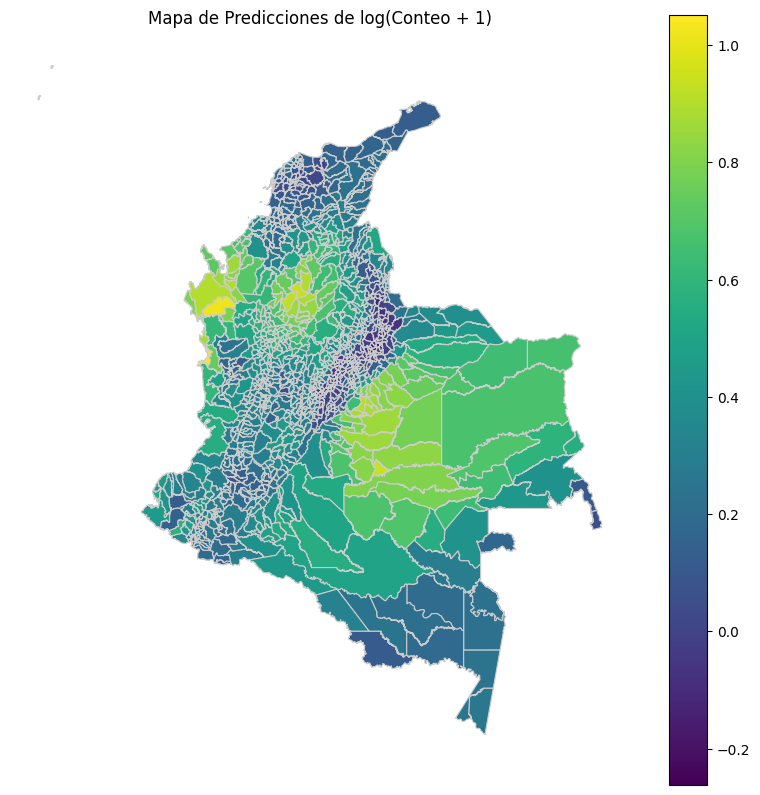

In [6]:
# Obtener las predicciones
y_pred = model.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['y_pred'] = y_pred

# Graficar el mapa con los valores de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='y_pred', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de log(Conteo + 1)')
ax.set_axis_off()
plt.show()

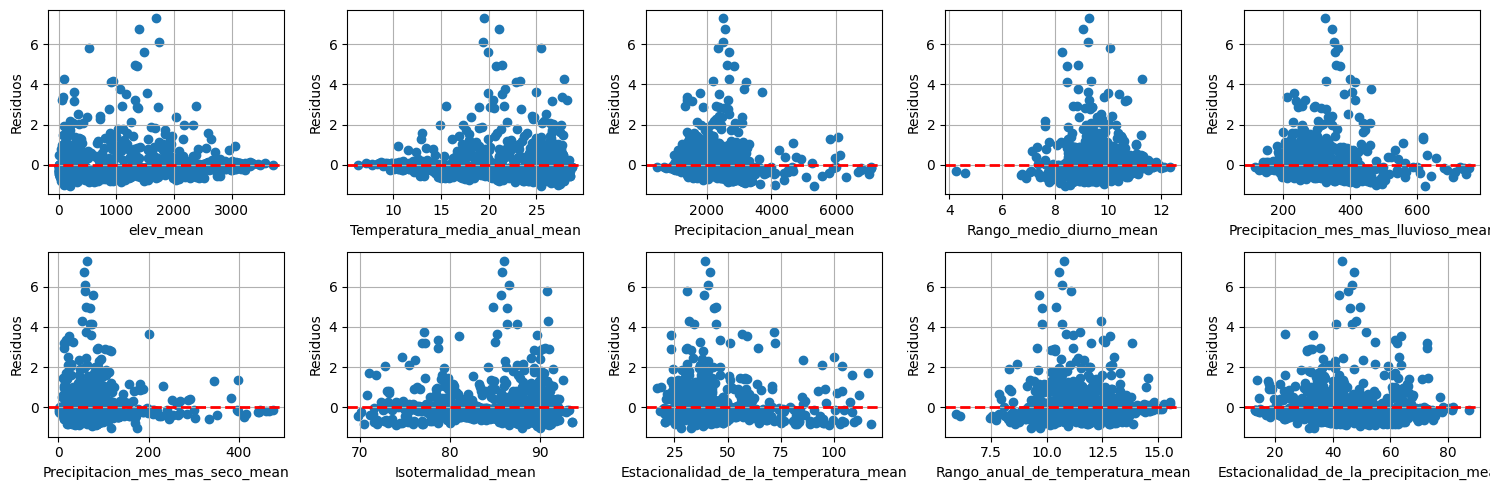

In [7]:
# Calcular los residuos
residuals = y - y_pred

# Crear las figuras scatter para comparar los residuos con cada variable X
plt.figure(figsize=(15, 5))

for i, variable in enumerate(var):
    plt.subplot(2, 5, i + 1)
    plt.scatter(gdf[variable], residuals)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel(variable)
    plt.ylabel('Residuos')
    #plt.title(f'Residuos vs. {variable}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Distribución binomial (para Regresión Logística)

In [8]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# Preparar datos para regresión logística
gdf['evento'] = np.where(gdf['conteo'] >= 1, 1, 0)
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']
y = gdf['evento']

# Escalar variables independientes
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión logística
model = sm.Logit(y, X).fit()

# Imprimir un resumen del modelo de regresión logística
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.447687
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 evento   No. Observations:                 1121
Model:                          Logit   Df Residuals:                     1110
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                  0.1049
Time:                        18:27:29   Log-Likelihood:                -501.86
converged:                       True   LL-Null:                       -560.67
Covariance Type:            nonrobust   LLR p-value:                 1.528e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6645      0.096    -17.252      0.000      -1.854      -1.475
x1             0.9970      0.

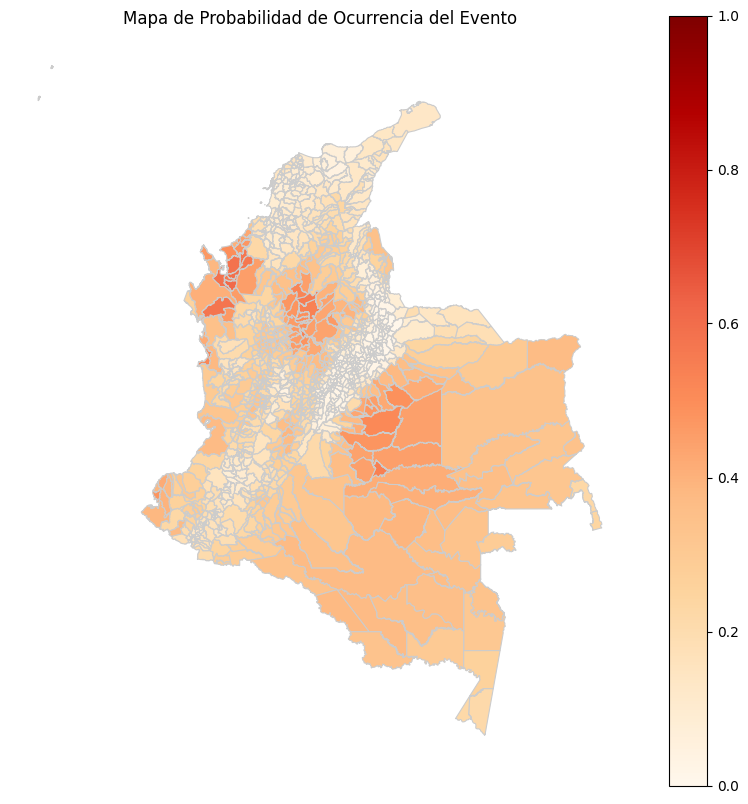

In [9]:
# Obtener las predicciones en términos de probabilidad
y_prob = model.predict(X)

# Añadir las probabilidades de predicción al GeoDataFrame
gdf['probability_evento'] = y_prob

# Graficar el mapa con las probabilidades de predicción
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='probability_evento', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=0, vmax=1)
ax.set_title('Mapa de Probabilidad de Ocurrencia del Evento')
ax.set_axis_off()
plt.show()

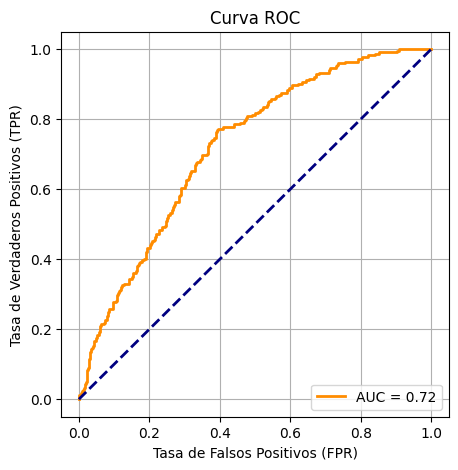

In [10]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Distribución de Poisson (para los modelos de regresión de Poisson)

In [16]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión de Poisson con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']  # No incluimos 'area' como predictor directamente ahora
exposure = np.log(gdf['area'])  # Logaritmo del área como medida de exposición

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión de Poisson con offset
poisson_model_offset = GLM(y, X, family=families.Poisson(), offset=exposure).fit()

# Imprimir un resumen del modelo de regresión de Poisson con offset
print(poisson_model_offset.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 conteo   No. Observations:                 1121
Model:                            GLM   Df Residuals:                     1110
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22964.
Date:                Tue, 24 Jun 2025   Deviance:                       45237.
Time:                        18:36:53   Pearson chi2:                 1.38e+08
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6538      0.038   -174.300      0.0

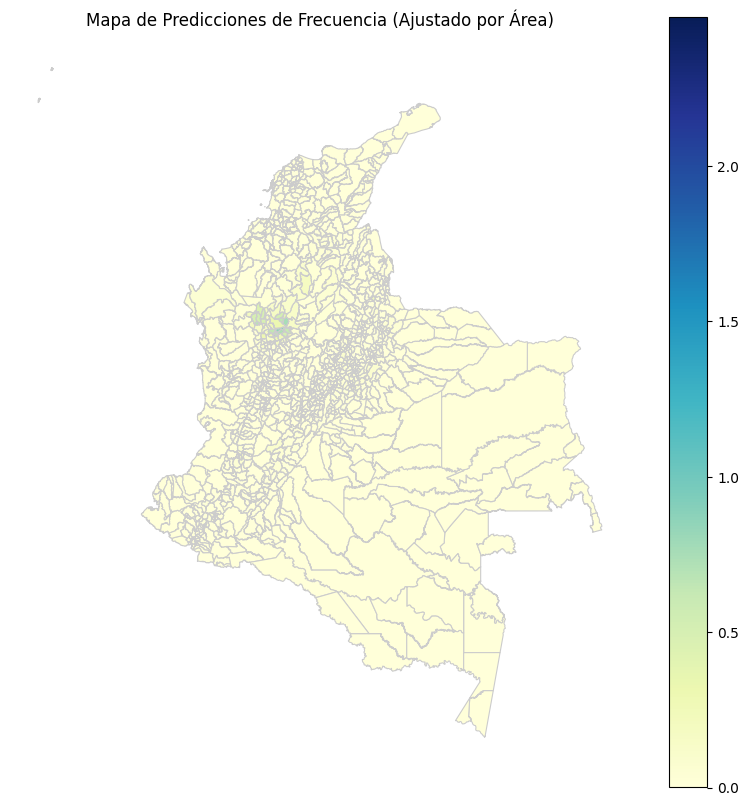

In [17]:
# Obtener las predicciones de frecuencia (ahora representan la frecuencia ajustada por el área)
y_pred_freq_offset = poisson_model_offset.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_offset'] = y_pred_freq_offset

# Calcular la diferencia entre el valor real y la predicción con offset
gdf['difference_lands_rec_offset'] = gdf['conteo'] - gdf['predicted_lands_rec_offset']

# Graficar el mapa con los valores de predicción de frecuencia ajustados por área
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_offset', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (Ajustado por Área)')
ax.set_axis_off()
plt.show()

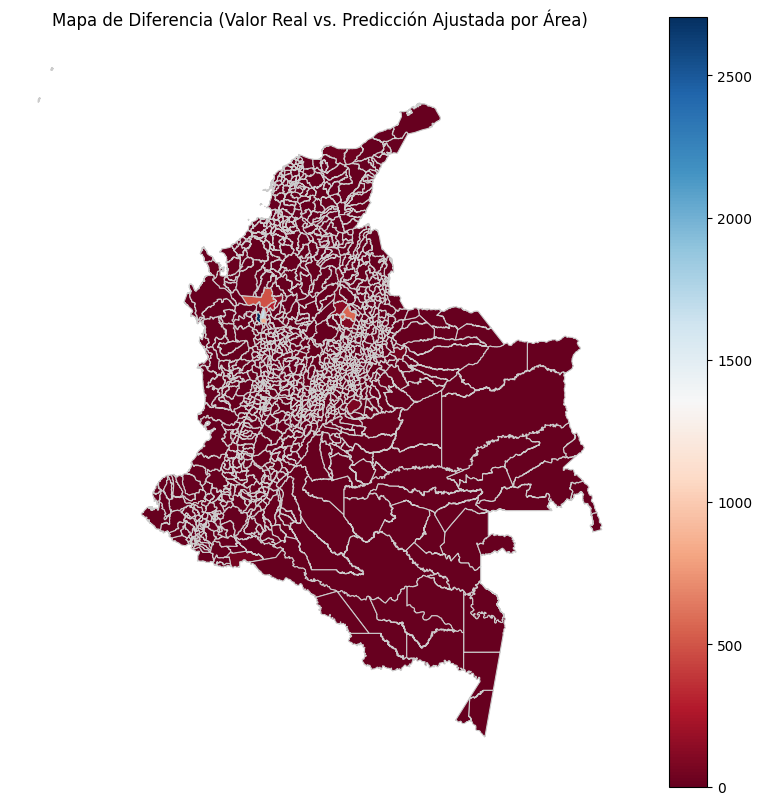

In [ ]:
# Graficar el mapa con la diferencia entre el valor real y la predicción ajustada por área
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_offset', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Ajustada por Área)')
ax.set_axis_off()
plt.show()

# Distribución Binomial Negativa (para modelos de regresión binomial negativa)


In [50]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión binomial negativa con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean',
       'Rango_medio_diurno_mean', 'Precipitacion_mes_mas_lluvioso_mean',
       'Precipitacion_mes_mas_seco_mean', 'Isotermalidad_mean',
       'Estacionalidad_de_la_temperatura_mean',
       'Rango_anual_de_temperatura_mean',
       'Estacionalidad_de_la_precipitacion_mean']   # No incluimos 'area' como predictor directamente ahora

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión binomial negativa sin offset
negative_binomial_model_offset = GLM(y, X, family=families.NegativeBinomial()).fit()

# Imprimir un resumen del modelo de regresión binomial negativa con offset
print(negative_binomial_model_offset.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 conteo   No. Observations:                 1121
Model:                            GLM   Df Residuals:                     1110
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.8
Date:                Tue, 24 Jun 2025   Deviance:                       3070.4
Time:                        18:37:27   Pearson chi2:                 2.36e+04
No. Iterations:                    49   Pseudo R-squ. (CS):             0.9145
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2387      0.050      4.815      0.0

c:\Users\Valentina Cardona\anaconda3\envs\GeoAnalysis\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


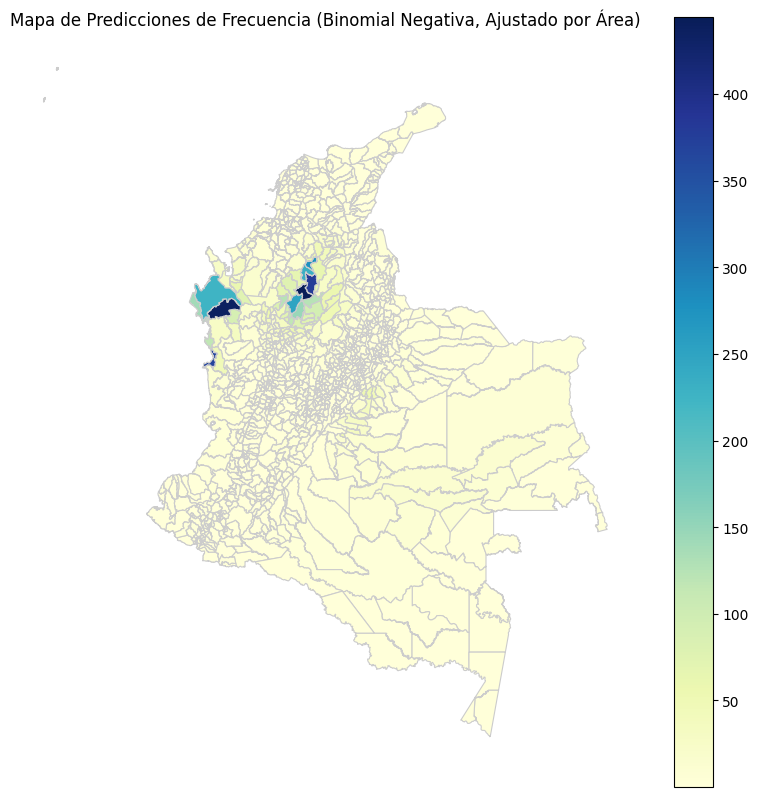

In [ ]:
# Obtener las predicciones de frecuencia (ahora representan la frecuencia sin ajuste por área)
y_pred_freq_offset_nb = negative_binomial_model_offset.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_offset_nb'] = y_pred_freq_offset_nb

# Calcular la diferencia entre el valor real y la predicción con offset (Binomial Negativa)
gdf['difference_lands_rec_offset_nb'] = gdf['conteo'] - gdf['predicted_lands_rec_offset_nb']

# Graficar el mapa con los valores de predicción de frecuencia sin ajuste por área (Binomial Negativa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_offset_nb', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (Binomial Negativa, Ajustado por Área)')
ax.set_axis_off()
plt.show()

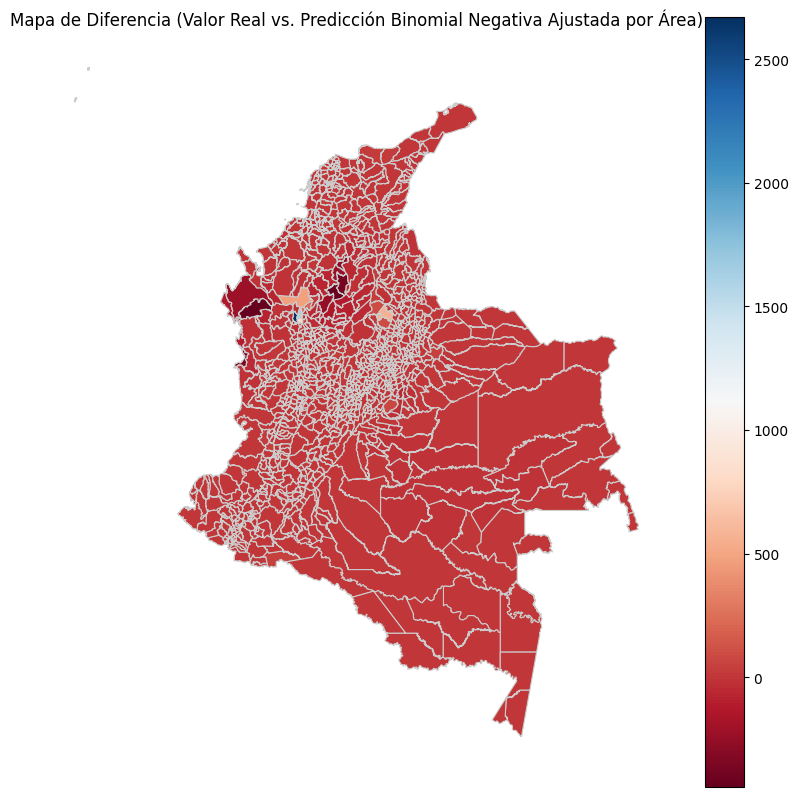

In [19]:
# Graficar el mapa con la diferencia entre el valor real y la predicción ajustada por área (Binomial Negativa)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_offset_nb', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción Binomial Negativa Ajustada por Área)')
ax.set_axis_off()
plt.show()

# Modelos de ceros inflados

In [59]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedPoisson
from sklearn.preprocessing import StandardScaler

# Preparar datos para regresión Zero-Inflated Poisson con offset por área
y = gdf['conteo']
var = ['elev_mean',
       'Temperatura_media_anual_mean', 'Precipitacion_anual_mean']  # No incluimos 'area' como predictor directamente ahora
exposure = np.log(gdf['area'])  # Logaritmo del área como medida de exposición

# Escalar variables independientes (excepto el área que se usa como offset)
st = StandardScaler()
X_scaled = st.fit_transform(gdf[var])

# Añadir una constante para el término de intercepción
X = sm.add_constant(X_scaled)

# Entrenar el modelo de regresión Zero-Inflated Poisson con offset
zip_model_offset = ZeroInflatedPoisson(y, X, exposure=exposure).fit()

# Imprimir un resumen del modelo de regresión Zero-Inflated Poisson con offset
print(zip_model_offset.summary())

Optimization terminated successfully.
         Current function value: 17.445517
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                  conteo   No. Observations:                 1121
Model:             ZeroInflatedPoisson   Df Residuals:                     1117
Method:                            MLE   Df Model:                            3
Date:                 Mon, 23 Jun 2025   Pseudo R-squ.:                  0.2202
Time:                         12:53:20   Log-Likelihood:                -19556.
converged:                        True   LL-Null:                       -25080.
Covariance Type:             nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     1.377

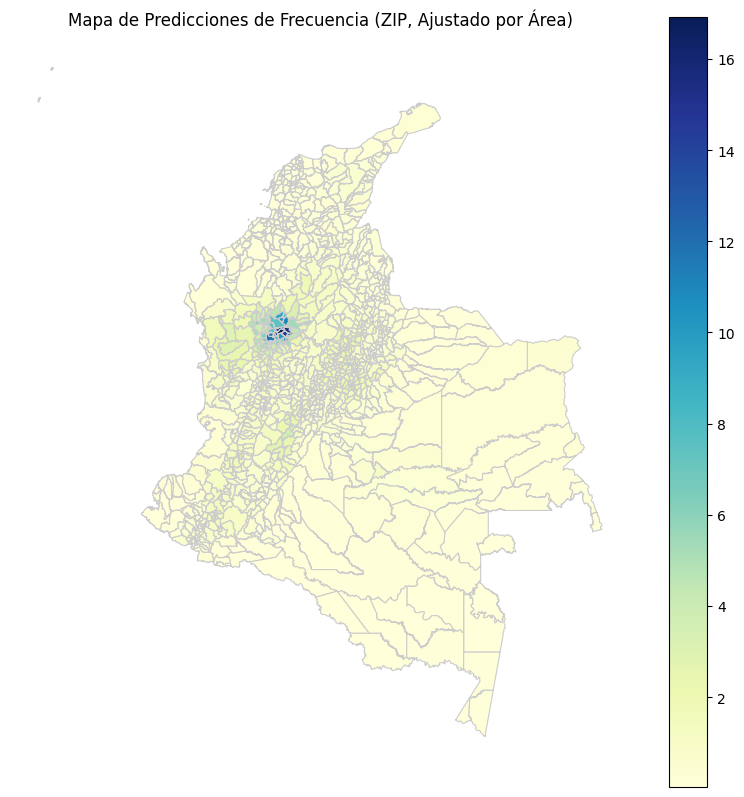

In [60]:
# Obtener las predicciones de frecuencia
y_pred_freq_offset_zip = zip_model_offset.predict(X)

# Añadir las predicciones al GeoDataFrame
gdf['predicted_lands_rec_offset_zip'] = y_pred_freq_offset_zip

# Calcular la diferencia entre el valor real y la predicción con offset (ZIP)
gdf['difference_lands_rec_offset_zip'] = gdf['conteo'] - gdf['predicted_lands_rec_offset_zip']


# Graficar el mapa con los valores de predicción de frecuencia ajustados por área (ZIP)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_lands_rec_offset_zip', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Predicciones de Frecuencia (ZIP, Ajustado por Área)')
ax.set_axis_off()
plt.show()

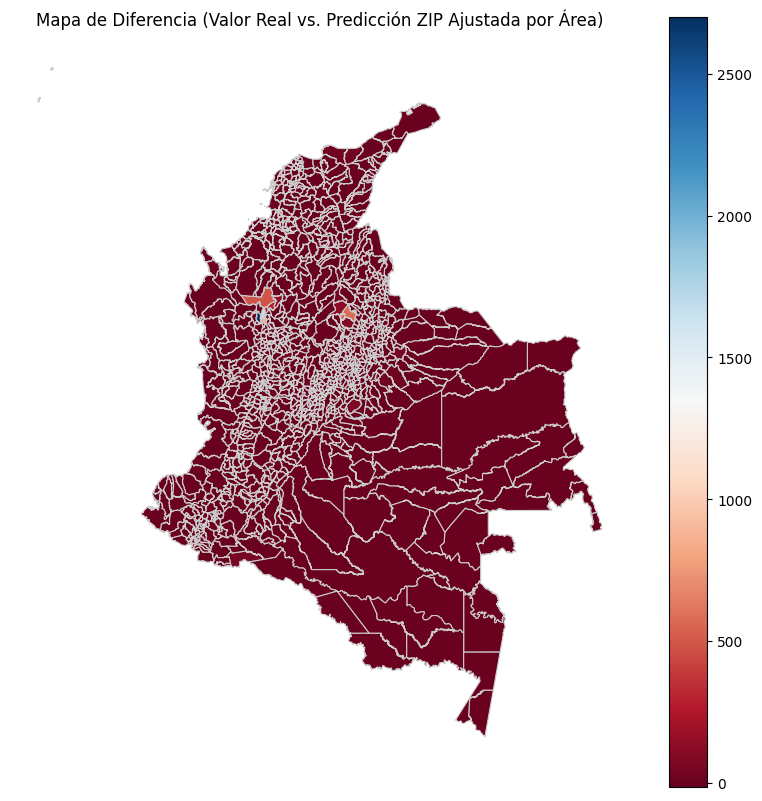

In [61]:
# Graficar el mapa con la diferencia entre el valor real y la predicción ajustada por área (ZIP)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='difference_lands_rec_offset_zip', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Diferencia (Valor Real vs. Predicción ZIP Ajustada por Área)')
ax.set_axis_off()
plt.show()

### Ejemplo. MATRIZ DE PESOS BASADA EN LOS K-VECINOS MÁS CERCANOS

In [28]:
#Matriz de pesos basada en los 4 vecinos más cercanos
from pysal.lib import weights

w_k4 = weights.distance.KNN.from_dataframe(gdf, k=4)

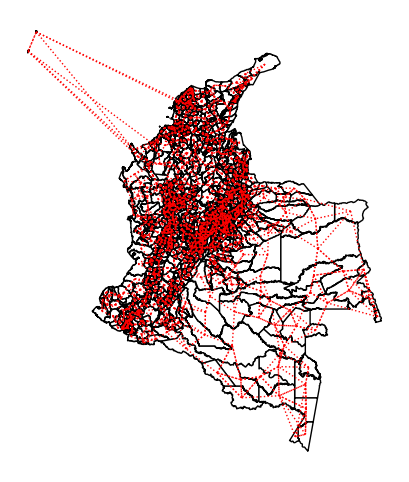

In [25]:
f, axs = plt.subplots(figsize=(6,6))
ax = gdf.plot(edgecolor="k", facecolor="w", ax=axs)
w_k4.plot(gdf,ax=axs,edge_kws=dict(color="r", linestyle=":", linewidth=1),node_kws=dict(marker=""),)
axs.set_axis_off()